# **Rotten Tomatoes Analysis**

Importing relevant libraries

In [254]:
import numpy as np
import pandas as pd
import re

from matplotlib import pyplot as plt
%matplotlib inline



fresh_tomato = 0.6 # if the review rating is at least 60% positive, it is a fresh tomato.
rotten_tomato = 0.5 


### **Working Files**


In [2]:
rt_movie_info = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz',encoding='unicode_escape', sep='\t')
rt_reviews = pd.read_csv('data/zippedData/rt.reviews.tsv.gz',encoding='unicode_escape', sep='\t')

### **High Level Analysis**

Checking to see if there are any relation between the two dataframes (rt_movie_info and rt_reviews)

In [3]:
print(rt_movie_info.columns)
print()
print(rt_reviews.columns)

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


### Comment:
We have 'id' and 'rating' that match up, but it is too early to tell if they have anything in common.

In [4]:
print(f'*** rt_movie_info DataFrame ***')
rt_movie_info.info()

*** rt_movie_info DataFrame ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Comment:
There is a good chunk of missing data for 'curreny', 'box office', and 'studio'. We also have other columns that have a bit of missing values. Depending on their value, I may or may not need to clean them.

In [5]:
print(f'*** rt_reviews DataFrame ***')
rt_reviews.info()

*** rt_reviews DataFrame ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Comment:
We do have some more missing values, but the biggest issues are the data types. I may need to convert them to int or float. Most likely the 'rating' column.

In [256]:
rt_movie_info

,id,rating,genre,theater_date
0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971"
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012"
2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996"
3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994"
4,8,PG,Drama|Kids and Family,"Mar 3, 2000"
...,...,...,...,...
1195,1996,R,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006"
1196,1997,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993"
1197,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962"
1198,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993"


### Comment:
Rating looks to pertain to the actual movie rating. I do see we can catagorize the genre to make a graph based on that.
I don't see any value for the following columns: 'synopsis', 'currency', 'box office' (missing data, may need to talk with 
Hatice about this one), and studio (may change my mind later).

In [7]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


### Comment:
We do have some relatable columns! The 'id' columns will come in handy when handling these datasets. The 'rating' column looks to be a mess, and will take considerable time to clean. The next most useful column would be 'fresh'! Rotten Tomatoes has a rule where if the review is at LEAST 60% in rating, then it is a fresh tomato!. I'm not sure if I can get any valuable data/info from the rest of the columns. Bummer.

## **Cleaning rt_movie_info**

- Drop irrelevant rows

In [8]:
rt_null_genre = rt_movie_info[rt_movie_info['genre'].isna()]
rt_null_genre

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,289,NaN,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95 minutes,NaN
250,327,"When a new robot, Raymond, defeats the three h...",NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 minutes,NaN
658,843,Miners want to drill for billions of dollars w...,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 minutes,NaN
1082,1393,Steven Seagal plays an expert sniper on a spec...,R,NaN,Fred Olen Ray,Fred Olen Ray,NaN,NaN,NaN,NaN,84 minutes,NaN
1342,1736,NaN,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Comment:
These rows do not give us enough information to make any conclusions from and do not provide value. Lets DROP EM!

In [9]:
# Does not give any relevant info. drop em.
dropem = rt_null_genre.index
dropem = list(dropem)
rt_movie_info = rt_movie_info.drop(dropem)
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


### Comment:
Rows have been dropped! But the index is all messed up. Take a look at the total rows and comapre it to the last index number. I'll need to reset it. I am also going to drop rows on 'theater_date' since I want to be able to see the popularity over time. Maybe there is a pattern on what is on the rise?

In [10]:
dropem = rt_movie_info[rt_movie_info['theater_date'].isna()]
dropem = list(dropem.index)

rt_movie_info = rt_movie_info.drop(dropem)
rt_movie_info

rt_movie_info = rt_movie_info.reset_index(drop=True)
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1196,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1197,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1198,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1199,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [11]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1201 non-null   int64 
 1   synopsis      1198 non-null   object
 2   rating        1201 non-null   object
 3   genre         1201 non-null   object
 4   director      1083 non-null   object
 5   writer        938 non-null    object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      334 non-null    object
 9   box_office    334 non-null    object
 10  runtime       1194 non-null   object
 11  studio        464 non-null    object
dtypes: int64(1), object(11)
memory usage: 112.7+ KB


### Comment:
Lets take a look at 'rating'. It should hold some good value to see if a certain rating is popular.

In [12]:
rt_movie_info['rating'].value_counts()

R        469
NR       251
PG-13    228
PG       204
G         48
NC17       1
Name: rating, dtype: int64

### Comment:
Woah! There is about 2x the amount of "R" and "NR" movies compared to the other ratings! Looks like I can get rid of 'NC17' because popularity wise, it would not give us much value. We are going for what sells/popular.

In [13]:
dropem = rt_movie_info[rt_movie_info['rating'] == 'NC17']

dropem = dropem.index
dropem = list(dropem)
rt_movie_info = rt_movie_info.drop(dropem)

rt_movie_info = rt_movie_info.reset_index(drop=True)
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1196,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1197,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1198,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [14]:
rt_movie_info['rating'].value_counts()

R        469
NR       251
PG-13    228
PG       204
G         48
Name: rating, dtype: int64

In [15]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1200 non-null   int64 
 1   synopsis      1197 non-null   object
 2   rating        1200 non-null   object
 3   genre         1200 non-null   object
 4   director      1082 non-null   object
 5   writer        937 non-null    object
 6   theater_date  1200 non-null   object
 7   dvd_date      1200 non-null   object
 8   currency      333 non-null    object
 9   box_office    333 non-null    object
 10  runtime       1193 non-null   object
 11  studio        463 non-null    object
dtypes: int64(1), object(11)
memory usage: 112.6+ KB


## Decision:
Going over the dataset, I am going to remove the following columns: 
- 'synopsis' - I don't have a movie title and cannot go through each value to "guess" what movie it is.
- 'director' - Same as 'synopsis'. Directors can have mulitple movies. I can't make a logical guess on this.
- 'writer' - Same as above.
- 'dvd_date' - I'm looking for opening figures.
- 'currency' - Would be relevant if I had more data on 'box office'. It would be possible to see what genre makes the most money.
- 'box_office' - NEED MORE DATA!! can't use it.
- 'studio' - missing to much data and not much value
- 'runtime = 

In [16]:
dropem = ['synopsis', 'director', 'writer', 'dvd_date', 'currency', 'box_office', 'studio', 'runtime']
rt_movie_info = rt_movie_info.drop(dropem, 1)

rt_movie_info

,id,rating,genre,theater_date
0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971"
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012"
2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996"
3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994"
4,8,PG,Drama|Kids and Family,"Mar 3, 2000"
...,...,...,...,...
1195,1996,R,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006"
1196,1997,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993"
1197,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962"
1198,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993"


In [17]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1200 non-null   int64 
 1   rating        1200 non-null   object
 2   genre         1200 non-null   object
 3   theater_date  1200 non-null   object
dtypes: int64(1), object(3)
memory usage: 37.6+ KB


In [18]:
rt_movie_info_clone = rt_movie_info.copy()
rt_movie_info_clone

,id,rating,genre,theater_date
0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971"
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012"
2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996"
3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994"
4,8,PG,Drama|Kids and Family,"Mar 3, 2000"
...,...,...,...,...
1195,1996,R,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006"
1196,1997,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993"
1197,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962"
1198,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993"


In [19]:
i = 0

for genre in rt_movie_info_clone['genre']:
    if '|' in genre:
        rt_movie_info_clone['genre'][i] = (genre.split('|'))
    else:
        rt_movie_info_clone['genre'][i] = [genre]
    i +=1




<ipython-input-19-89dfad40ebb1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movie_info_clone['genre'][i] = (genre.split('|'))
<ipython-input-19-89dfad40ebb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movie_info_clone['genre'][i] = [genre]


In [20]:
rt_movie_info_clone

,id,rating,genre,theater_date
0,1,R,"[Action and Adventure, Classics, Drama]","Oct 9, 1971"
1,3,R,"[Drama, Science Fiction and Fantasy]","Aug 17, 2012"
2,5,R,"[Drama, Musical and Performing Arts]","Sep 13, 1996"
3,6,R,"[Drama, Mystery and Suspense]","Dec 9, 1994"
4,8,PG,"[Drama, Kids and Family]","Mar 3, 2000"
...,...,...,...,...
1195,1996,R,"[Action and Adventure, Horror, Mystery and Sus...","Aug 18, 2006"
1196,1997,PG,"[Comedy, Science Fiction and Fantasy]","Jul 23, 1993"
1197,1998,G,"[Classics, Comedy, Drama, Musical and Performi...","Jan 1, 1962"
1198,1999,PG,"[Comedy, Drama, Kids and Family, Sports and Fi...","Apr 1, 1993"


In [21]:
rt_movie_info_clone['genre'].apply(type).value_counts()

<class 'list'>    1200
Name: genre, dtype: int64

In [22]:
rt_movie_info_clone['theater_date'] = pd.to_datetime(rt_movie_info_clone['theater_date'])

rt_movie_info_clone

,id,rating,genre,theater_date
0,1,R,"[Action and Adventure, Classics, Drama]",1971-10-09
1,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17
2,5,R,"[Drama, Musical and Performing Arts]",1996-09-13
3,6,R,"[Drama, Mystery and Suspense]",1994-12-09
4,8,PG,"[Drama, Kids and Family]",2000-03-03
...,...,...,...,...
1195,1996,R,"[Action and Adventure, Horror, Mystery and Sus...",2006-08-18
1196,1997,PG,"[Comedy, Science Fiction and Fantasy]",1993-07-23
1197,1998,G,"[Classics, Comedy, Drama, Musical and Performi...",1962-01-01
1198,1999,PG,"[Comedy, Drama, Kids and Family, Sports and Fi...",1993-04-01


In [23]:
rt_movie_info_clone['theater_date'].apply(type).value_counts()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>    1200
Name: theater_date, dtype: int64

In [24]:
dropem = rt_movie_info_clone[rt_movie_info_clone['theater_date'] < '2000']

dropem = dropem.index
dropem = list(dropem)
rt_movie_info_clone = rt_movie_info_clone.drop(dropem)

rt_movie_info_clone = rt_movie_info_clone.reset_index(drop=True)
rt_movie_info_clone

,id,rating,genre,theater_date
0,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17
1,8,PG,"[Drama, Kids and Family]",2000-03-03
2,10,PG-13,[Comedy],2002-01-11
3,13,R,[Drama],2006-04-27
4,14,R,[Drama],2010-06-30
...,...,...,...,...
513,1981,NR,"[Comedy, Drama]",2012-10-05
514,1985,R,"[Horror, Mystery and Suspense]",2007-06-01
515,1986,PG,"[Art House and International, Comedy, Drama]",2002-08-30
516,1996,R,"[Action and Adventure, Horror, Mystery and Sus...",2006-08-18


In [25]:
print(rt_movie_info_clone['theater_date'].max())
print(rt_movie_info_clone['theater_date'].min())

rt_movie_info_clone.info()

2018-10-19 00:00:00
2000-01-01 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            518 non-null    int64         
 1   rating        518 non-null    object        
 2   genre         518 non-null    object        
 3   theater_date  518 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 16.3+ KB


In [26]:
rt_movie_info_clean = rt_movie_info_clone

In [102]:
types_genre = []

for genre_list in rt_movie_info_clean['genre']:
    for genre in genre_list:
        if genre in types_genre:
            pass
        elif genre in ['Television', 'Cult Movies', 'Special Interest']:  # not really genres for creating new movies.
            pass
        else:
            types_genre.append(genre)


fresh_rotten_tally = []

for genre in types_genre:
    if genre in fresh_rotten_tally:
        pass
    else:
        fresh_rotten_tally.append({'genre': genre,'fresh':0, 'rotten':0})


rating_tally = {}

for genre in types_genre:
    if genre in rating_tally:
        pass
    else:
        rating_tally[genre] = {'R':0, 'NR':0, 'PG':0, 'PG-13':0, 'G':0}


review_score = {}

for genre in types_genre:
    if genre in review_score:
        pass
    else:
        review_score[genre] = {'mean':0}


In [103]:
fresh_rotten_tally

[{'genre': 'Drama', 'fresh': 0, 'rotten': 0},
 {'genre': 'Science Fiction and Fantasy', 'fresh': 0, 'rotten': 0},
 {'genre': 'Kids and Family', 'fresh': 0, 'rotten': 0},
 {'genre': 'Comedy', 'fresh': 0, 'rotten': 0},
 {'genre': 'Documentary', 'fresh': 0, 'rotten': 0},
 {'genre': 'Mystery and Suspense', 'fresh': 0, 'rotten': 0},
 {'genre': 'Action and Adventure', 'fresh': 0, 'rotten': 0},
 {'genre': 'Art House and International', 'fresh': 0, 'rotten': 0},
 {'genre': 'Musical and Performing Arts', 'fresh': 0, 'rotten': 0},
 {'genre': 'Horror', 'fresh': 0, 'rotten': 0},
 {'genre': 'Romance', 'fresh': 0, 'rotten': 0},
 {'genre': 'Sports and Fitness', 'fresh': 0, 'rotten': 0},
 {'genre': 'Animation', 'fresh': 0, 'rotten': 0},
 {'genre': 'Classics', 'fresh': 0, 'rotten': 0},
 {'genre': 'Western', 'fresh': 0, 'rotten': 0},
 {'genre': 'Faith and Spirituality', 'fresh': 0, 'rotten': 0},
 {'genre': 'Anime and Manga', 'fresh': 0, 'rotten': 0}]

## **Cleaning rt_reviews**

In [28]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


- review
- critic
- publisher
- date

In [29]:
dropem = ['review', 'critic', 'publisher', 'date']
rt_reviews = rt_reviews.drop(dropem, 1)

rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   top_critic  54432 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


In [30]:
# Missing data: review, rating, critic, and publisher
rt_reviews_null = rt_reviews[rt_reviews['rating'].isna()]
rt_reviews_null['fresh'].value_counts()

fresh     8174
rotten    5343
Name: fresh, dtype: int64

In [31]:
rt_reviews_null['rating'] = rt_reviews_null['rating'].replace(np.nan, 0.0)
rt_reviews_null.reset_index(inplace=True)


rt_reviews_null

<ipython-input-31-4c94fe3593a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_reviews_null['rating'] = rt_reviews_null['rating'].replace(np.nan, 0.0)


,index,id,rating,fresh,top_critic
0,1,3,0.0,rotten,0
1,2,3,0.0,fresh,0
2,3,3,0.0,fresh,0
3,4,3,0.0,fresh,0
4,5,3,0.0,fresh,0
...,...,...,...,...,...
13512,54409,2000,0.0,rotten,0
13513,54417,2000,0.0,fresh,1
13514,54425,2000,0.0,fresh,0
13515,54426,2000,0.0,rotten,1


In [32]:
rt_reviews_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13517 entries, 0 to 13516
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       13517 non-null  int64  
 1   id          13517 non-null  int64  
 2   rating      13517 non-null  float64
 3   fresh       13517 non-null  object 
 4   top_critic  13517 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 528.1+ KB


# Working on not null for 'rating'

In [43]:
rt_reviews_not_null = rt_reviews[rt_reviews['rating'].notna()]
rt_reviews_not_null.reset_index(inplace=True)
rt_reviews_not_null['rating'] = rt_reviews_not_null['rating'].str.replace(" ","")

rt_reviews_not_null


<ipython-input-43-82b91b03dc0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_reviews_not_null['rating'] = rt_reviews_not_null['rating'].str.replace(" ","")


,index,id,rating,fresh,top_critic
0,0,3,3/5,fresh,0
1,6,3,C,rotten,0
2,7,3,2/5,rotten,0
3,11,3,B-,fresh,0
4,12,3,2/4,rotten,0
...,...,...,...,...,...
40910,54424,2000,1.5/5,rotten,1
40911,54428,2000,1/5,rotten,0
40912,54429,2000,2/5,rotten,0
40913,54430,2000,2.5/5,rotten,0


In [44]:
rt_reviews_not_null.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40915 entries, 0 to 40914
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       40915 non-null  int64 
 1   id          40915 non-null  int64 
 2   rating      40915 non-null  object
 3   fresh       40915 non-null  object
 4   top_critic  40915 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [45]:
count = 0
scale = 1.0

def check_float(potential_float):
    """
    Takes one argument and checks if it can be converted to a 
    float data type.

    Outputs True if argument can be converted to float and 
    False if not.
    """
    try:
        float(potential_float)

        return True
    except ValueError:
        return False

def set_fresh(result_):
    if rt_reviews_not_null['fresh'][count] == 'fresh':    # Confirming that if the review is fresh
        if result_ > scale:                                # will result in a perfect score and fresh
            rt_reviews_not_null['rating'][count] = scale
        elif result_ >= fresh_tomato:                      # the result represents a fresh accurately
            rt_reviews_not_null['rating'][count] = result_
            
    else:
        if result_ < fresh_tomato:                         # will set result as rating for rotten
            rt_reviews_not_null['rating'][count] = result_
        elif result_ > fresh_tomato:                       # if result is larger than fresh, make rotten
            rt_reviews_not_null['rating'][count] = rotten_tomato

def set_default():
    if rt_reviews_not_null['fresh'][count] == 'fresh':
        rt_reviews_not_null['rating'][count] = fresh_tomato
    else:
        rt_reviews_not_null['rating'][count] = rotten_tomato


scores_without_fresh = 0

grade_scale = { 'A' : 1.0,
                'B' : 0.75,
                'C' : 0.50,
                'D' : 0.20,
                'F' : 0.0
                }

for rate in rt_reviews_not_null['rating']:
    # -------------------------------------------------------------------------------------------------- #
    # Searching for '/' to split left and right numbers. Then divide. Will not take strings with letters #
    # -------------------------------------------------------------------------------------------------- #
    if '/' in rate: 
        i = rate.find('/')                  # i = the index location

        numerator = float(rate[:i])         # selecting the number before '/' as numerator
        denominator = float(rate[i+1:])     # selecting the number after '/' as denominator

        result = (numerator / denominator)
        set_fresh(result)
        
            
    # -------------------------------------------------------------------------------------------------- #
    # If there are letters in the string, compare the first letter to the grade_scale dict for value     #
    # -------------------------------------------------------------------------------------------------- #
    elif re.search('[a-zA-Z]', rate) != None:
        for grade, value in grade_scale.items():    # using grade_scale on rate
            if grade == rate[0]:
                set_fresh(value)
                break
            else:                                   # If not on the grade_scale, refer to 'fresh' column
                set_default()
                break


    # -------------------------------------------------------------------------------------------------- #
    # Calls check_float() to check if string can be converted to float. If True, assigns value. If       #
    # False, throws error.
    # -------------------------------------------------------------------------------------------------- #
        

    # -------------------------------------------------------------------------------------------------- #
    # If anything gets through, refer to 'fresh' column to assign value                                  #
    # -------------------------------------------------------------------------------------------------- #
    else:
        if check_float(rate) == True:
            set_default()
        else:
            set_default()
            print(f'string at {count}. with a value of {rate}')

    count +=1
#rt_reviews_not_null['rating'] = rt_reviews_not_null['rating'].convert_dtypes()  # Finalize the data type of the column
print('***************')
print(f'**  {count}  **')
print('***************')



<ipython-input-45-b98921c4e7db>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_reviews_not_null['rating'][count] = result_
<ipython-input-45-b98921c4e7db>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_fresh(result)
<ipython-input-45-b98921c4e7db>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_reviews_not_null['rating'][count] = rotten_tomato
<ipython-input-45-b98921c4e7db>:71: SettingWithCopyWarning: 
A value is try

string at 22053. with a value of 1-5
***************
**  40915  **
***************


In [46]:
rt_reviews_not_null['rating'].apply(type).value_counts()

<class 'float'>    40182
<class 'str'>        733
Name: rating, dtype: int64

In [47]:
rt_reviews_not_null[rt_reviews_not_null['rating'] == "4/10"]

,index,id,rating,fresh,top_critic
1993,2615,77,4/10,fresh,0


In [48]:
type(rt_reviews_not_null['rating'][1993])

str

In [49]:
count = 0
what = 0


for veggie in rt_reviews_not_null['fresh']:
    if veggie == 'rotten' and rt_reviews_not_null['rating'][count] > 0.6:
        print(count)
        what += 1
    count +=1

print(what)

TypeError: '>' not supported between instances of 'str' and 'float'

In [53]:
count = 0
string_count = 0
for rate in rt_reviews_not_null['rating']:
    if isinstance(rate,(float)) == False and '/' in rate:
        print(f'check row {count}!', type(rate))
        string_count +=1
        pass
    else:
        pass
    count +=1
print(string_count)

check row 138! <class 'str'>
check row 190! <class 'str'>
check row 192! <class 'str'>
check row 220! <class 'str'>
check row 257! <class 'str'>
check row 265! <class 'str'>
check row 287! <class 'str'>
check row 293! <class 'str'>
check row 298! <class 'str'>
check row 336! <class 'str'>
check row 337! <class 'str'>
check row 367! <class 'str'>
check row 482! <class 'str'>
check row 487! <class 'str'>
check row 489! <class 'str'>
check row 595! <class 'str'>
check row 629! <class 'str'>
check row 851! <class 'str'>
check row 858! <class 'str'>
check row 874! <class 'str'>
check row 875! <class 'str'>
check row 881! <class 'str'>
check row 884! <class 'str'>
check row 889! <class 'str'>
check row 890! <class 'str'>
check row 989! <class 'str'>
check row 1023! <class 'str'>
check row 1109! <class 'str'>
check row 1122! <class 'str'>
check row 1221! <class 'str'>
check row 1294! <class 'str'>
check row 1531! <class 'str'>
check row 1620! <class 'str'>
check row 1786! <class 'str'>
check 

In [54]:
rt_reviews_clean = pd.concat([rt_reviews_not_null, rt_reviews_null], ignore_index=True)
rt_reviews_clean = rt_reviews_clean.sort_values(by= 'index')

rt_reviews_clean = rt_reviews_clean.reset_index(drop=True)  # Resetting the index


rt_reviews_clean

,index,id,rating,fresh,top_critic
0,0,3,0.6,fresh,0
1,1,3,0,rotten,0
2,2,3,0,fresh,0
3,3,3,0,fresh,0
4,4,3,0,fresh,0
...,...,...,...,...,...
54427,54427,2000,0,fresh,1
54428,54428,2000,0.2,rotten,0
54429,54429,2000,0.4,rotten,0
54430,54430,2000,0.5,rotten,0


In [55]:
rt_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       54432 non-null  int64 
 1   id          54432 non-null  int64 
 2   rating      54432 non-null  object
 3   fresh       54432 non-null  object
 4   top_critic  54432 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ MB


In [56]:
rt_df = pd.merge(rt_movie_info_clean, rt_reviews_clean, on= 'id', how='inner')

rt_df

,id,rating_x,genre,theater_date,index,rating_y,fresh,top_critic
0,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,0,0.6,fresh,0
1,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,1,0,rotten,0
2,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,2,0,fresh,0
3,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,3,0,fresh,0
4,3,R,"[Drama, Science Fiction and Fantasy]",2012-08-17,4,0,fresh,0
...,...,...,...,...,...,...,...,...
41535,2000,R,"[Action and Adventure, Art House and Internati...",2001-09-27,54427,0,fresh,1
41536,2000,R,"[Action and Adventure, Art House and Internati...",2001-09-27,54428,0.2,rotten,0
41537,2000,R,"[Action and Adventure, Art House and Internati...",2001-09-27,54429,0.4,rotten,0
41538,2000,R,"[Action and Adventure, Art House and Internati...",2001-09-27,54430,0.5,rotten,0


In [57]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41540 entries, 0 to 41539
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            41540 non-null  int64         
 1   rating_x      41540 non-null  object        
 2   genre         41540 non-null  object        
 3   theater_date  41540 non-null  datetime64[ns]
 4   index         41540 non-null  int64         
 5   rating_y      41540 non-null  object        
 6   fresh         41540 non-null  object        
 7   top_critic    41540 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 2.9+ MB


In [113]:
fresh_rotten_tally[0]['fresh']

0

In [121]:
fresh_rotten_tally
row = 0

# we are looking at two columns: genre and fresh
for genre_list in rt_df['genre']:
    for genre in genre_list:
        for dict_genre in fresh_rotten_tally:
            if genre in dict_genre['genre']:
                if rt_df['fresh'][row] == 'fresh':
                    dict_genre['fresh'] +=1
                else:
                    dict_genre['rotten'] +=1
            else:
                pass
    row +=1






In [122]:
fresh_rotten_tally

[{'genre': 'Drama', 'fresh': 16017, 'rotten': 9297},
 {'genre': 'Science Fiction and Fantasy', 'fresh': 2406, 'rotten': 2600},
 {'genre': 'Kids and Family', 'fresh': 2195, 'rotten': 1347},
 {'genre': 'Comedy', 'fresh': 9360, 'rotten': 7003},
 {'genre': 'Documentary', 'fresh': 673, 'rotten': 177},
 {'genre': 'Mystery and Suspense', 'fresh': 5004, 'rotten': 3721},
 {'genre': 'Action and Adventure', 'fresh': 5545, 'rotten': 4369},
 {'genre': 'Art House and International', 'fresh': 2298, 'rotten': 801},
 {'genre': 'Musical and Performing Arts', 'fresh': 858, 'rotten': 613},
 {'genre': 'Horror', 'fresh': 1449, 'rotten': 1801},
 {'genre': 'Romance', 'fresh': 3845, 'rotten': 2411},
 {'genre': 'Sports and Fitness', 'fresh': 238, 'rotten': 85},
 {'genre': 'Animation', 'fresh': 1464, 'rotten': 809},
 {'genre': 'Classics', 'fresh': 183, 'rotten': 178},
 {'genre': 'Western', 'fresh': 411, 'rotten': 384},
 {'genre': 'Faith and Spirituality', 'fresh': 89, 'rotten': 77},
 {'genre': 'Anime and Manga',

In [259]:
fresh_rotten_df = pd.DataFrame(columns=['genre','fresh', 'rotten'])

for i in range(len(fresh_rotten_tally)):
    fresh_rotten_df = fresh_rotten_df.append(fresh_rotten_tally[i], ignore_index=True)

fresh_rotten_df

,genre,fresh,rotten
0,Drama,16017,9297
1,Science Fiction and Fantasy,2406,2600
2,Kids and Family,2195,1347
3,Comedy,9360,7003
4,Documentary,673,177
5,Mystery and Suspense,5004,3721
6,Action and Adventure,5545,4369
7,Art House and International,2298,801
8,Musical and Performing Arts,858,613
9,Horror,1449,1801


In [260]:
fresh_rotten_df = fresh_rotten_df.sort_values('fresh',ascending=False)
fresh_rotten_df.reset_index(inplace=True)

fresh_rotten_df.drop(['index'],1, inplace=True)

fresh_rotten_df

,genre,fresh,rotten
0,Drama,16017,9297
1,Comedy,9360,7003
2,Action and Adventure,5545,4369
3,Mystery and Suspense,5004,3721
4,Romance,3845,2411
5,Science Fiction and Fantasy,2406,2600
6,Art House and International,2298,801
7,Kids and Family,2195,1347
8,Animation,1464,809
9,Horror,1449,1801


In [261]:
fresh_rotten_df['total reviews'] = fresh_rotten_df['fresh'] + fresh_rotten_df['rotten']
fresh_rotten_df['percent fresh'] = fresh_rotten_df['fresh'] / fresh_rotten_df['total reviews']



top_ten_genres = fresh_rotten_df.head(10)
top_ten_genres

,genre,fresh,rotten,total reviews,percent fresh
0,Drama,16017,9297,25314,0.632733
1,Comedy,9360,7003,16363,0.572022
2,Action and Adventure,5545,4369,9914,0.55931
3,Mystery and Suspense,5004,3721,8725,0.573524
4,Romance,3845,2411,6256,0.61461
5,Science Fiction and Fantasy,2406,2600,5006,0.480623
6,Art House and International,2298,801,3099,0.74153
7,Kids and Family,2195,1347,3542,0.619706
8,Animation,1464,809,2273,0.644083
9,Horror,1449,1801,3250,0.445846


In [262]:
top_ten_genres = top_ten_genres.sort_values('percent fresh')
top_ten_genres.reset_index(inplace=True)

In [263]:
top_ten_genres

,index,genre,fresh,rotten,total reviews,percent fresh
0,9,Horror,1449,1801,3250,0.445846
1,5,Science Fiction and Fantasy,2406,2600,5006,0.480623
2,2,Action and Adventure,5545,4369,9914,0.55931
3,1,Comedy,9360,7003,16363,0.572022
4,3,Mystery and Suspense,5004,3721,8725,0.573524
5,4,Romance,3845,2411,6256,0.61461
6,7,Kids and Family,2195,1347,3542,0.619706
7,0,Drama,16017,9297,25314,0.632733
8,8,Animation,1464,809,2273,0.644083
9,6,Art House and International,2298,801,3099,0.74153


Text(0.5, 1.0, 'Percent Fresh Per Genre')

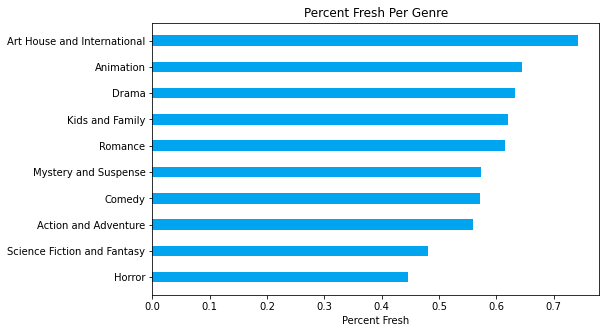

In [273]:
x_axis = top_ten_genres['genre']
y_axis = top_ten_genres['percent fresh']
width = 0.4

fig, ax = plt.subplots(figsize = (8,5))
fig.set_facecolor(color="white")


ax.barh(x_axis, y_axis, width, color='#00A4EF')

ax.set_xlabel('Percent Fresh')
ax.set_title("Percent Fresh Per Genre")



In [242]:
import seaborn as sbs

